In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, make_classification

%matplotlib inline

In [226]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class MyLR(LogisticRegression):
    
    def predict_raw(self, X):
        return (X @ self.coef_.T) + self.intercept_
    
    def predict_raw_label(self, X, label=0):
        return self.predict_raw(X)[:, label]

In [187]:
def plot_regions(X, y, clf):
    n = len(clf.intercept_)
    x_min, y_min = X.min(axis=0).round() - 0.5
    x_max, y_max = X.max(axis=0).round() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    fig, ax = plt.subplots(1, n, figsize=(12, 4))
    
    markers = ['o', '*', '+']
    
    for i in range(n):
        Z = clf.predict_raw_label(np.c_[xx.ravel(), yy.ravel()], label=i)
        Z = Z.reshape(xx.shape)
        Z = (Z > 0).astype('float32')
        
        ax[i].contourf(xx, yy, Z, alpha=0.4, cmap='gray')
        for j, marker in enumerate(markers):
            mask = y == j
            ax[i].scatter(
                X[mask, 0], X[mask, 1], s=40, c='black', marker=marker
            )
        
        ax[i].set_title(f'Boundary for label={i}')
    
    plt.show()

In [188]:
np.random.seed(0)

X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=0.5
)

model = MyLR()
model.fit(X, y)

MyLR()

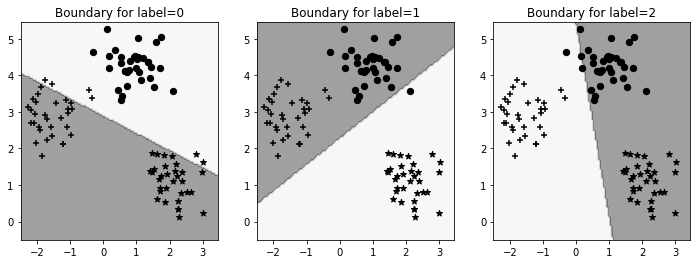

In [189]:
# white regions, prediction larger than 0
# grey regions, prediction smaller than 0
plot_regions(X, y, model)

In [88]:
model.predict_proba(X[0:1, :])

array([[2.25486337e-03, 9.96863594e-01, 8.81542938e-04]])

In [89]:
softmax(model.predict_raw(X[0:1, :]))

array([[2.25486337e-03, 9.96863594e-01, 8.81542938e-04]])

In [91]:
model.predict_raw_label(X[0:1, :], label=0)

array([-1.71745121])

In [92]:
model.predict_raw(X[0:1, :])

array([[-1.71745121,  4.37407336, -2.65662215]])